# Scrapping Amazon Reviews

In [1]:
#importing packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#using requests which alows us to send HTTP requests using Python
def get_soup(url):
    url = url
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [3]:
reviewlist = []
#fetching only data which is necessary like rating title and content given by the customers
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'content': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [4]:
#creating a loop from 1 to 100 reviews pages of the product
for x in range(1,10):
    soup = get_soup(f'https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break
print('Done')

Getting page: 1
0
Getting page: 2
10
Getting page: 3
20
Getting page: 4
30
Getting page: 5
40
Getting page: 6
50
Getting page: 7
60
Getting page: 8
70
Getting page: 9
80
Done


In [5]:
#creating dataframe of the list 
df = pd.DataFrame(reviewlist)
df

,title,rating,content
0,Product is great but recieved the used product...,4.0,Headphones are great but recieved the already ...
1,Never go for boat products again,1.0,Didn't last for a month... It just broke .. as...
2,Amazing 👌 (BT) HEADPHONES,5.0,The media could not be loaded.\n ...
3,Worst products.,1.0,Plz don't buy this product.. after using half ...
4,Perfect! Free of worries,5.0,Well I am writing this review after 6 months o...
...,...,...,...
75,Sound quality is fine. But it keeps disconnect...,3.0,Specially if you are not playing songs on your...
76,"Worst product, don't waste ur money",2.0,Earcups/cushion quality very bad. After using ...
77,within 1month use its dead not power on headph...,5.0,i purchase this boat 370 green headphone on 07...
78,Good audio but poor plastic,2.0,The audio is good and the battery is fine too ...


In [6]:
df.shape

(80, 3)

In [7]:
df['content'].unique

<bound method Series.unique of 0     Headphones are great but recieved the already ...
1     Didn't last for a month... It just broke .. as...
2     The media could not be loaded.\n              ...
3     Plz don't buy this product.. after using half ...
4     Well I am writing this review after 6 months o...
                            ...                        
75    Specially if you are not playing songs on your...
76    Earcups/cushion quality very bad. After using ...
77    i purchase this boat 370 green headphone on 07...
78    The audio is good and the battery is fine too ...
79    Audio quality is great, music, bass treble eve...
Name: content, Length: 80, dtype: object>

In [8]:
#combining two columns title and content to make a new column called reviews 
df["reviews"] = df["title"]+df["content"]
df.head()

,title,rating,content,reviews
0,Product is great but recieved the used product...,4.0,Headphones are great but recieved the already ...,Product is great but recieved the used product...
1,Never go for boat products again,1.0,Didn't last for a month... It just broke .. as...,Never go for boat products againDidn't last fo...
2,Amazing 👌 (BT) HEADPHONES,5.0,The media could not be loaded.\n ...,Amazing 👌 (BT) HEADPHONESThe media could not b...
3,Worst products.,1.0,Plz don't buy this product.. after using half ...,Worst products.Plz don't buy this product.. af...
4,Perfect! Free of worries,5.0,Well I am writing this review after 6 months o...,Perfect! Free of worriesWell I am writing this...


In [9]:
#instead of droping the columns we can access the columns we need in further process by iloc 
amazon = df.iloc[:,[1,3]]
amazon

,rating,reviews
0,4.0,Product is great but recieved the used product...
1,1.0,Never go for boat products againDidn't last fo...
2,5.0,Amazing 👌 (BT) HEADPHONESThe media could not b...
3,1.0,Worst products.Plz don't buy this product.. af...
4,5.0,Perfect! Free of worriesWell I am writing this...
...,...,...
75,3.0,Sound quality is fine. But it keeps disconnect...
76,2.0,"Worst product, don't waste ur moneyEarcups/cus..."
77,5.0,within 1month use its dead not power on headph...
78,2.0,Good audio but poor plasticThe audio is good a...


In [10]:
#now we have more information in less columns 

# Data Preprocessing

Data preprocessing is the process of transforming raw data into an understandable format. 

It is also an important step in data mining as we cannot work with raw data. 

The quality of the data should be checked before applying machine learning or data mining algorithms

In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   80 non-null     float64
 1   reviews  80 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [12]:
#checking null values  
amazon.isnull().sum()

rating     0
reviews    0
dtype: int64

In [13]:
amazon.describe()

,rating
count,80.000000
mean,3.025000
std,1.542438
min,1.000000
25%,1.750000
50%,3.000000
75%,4.250000
max,5.000000


In [14]:
#counts of every rating 
amazon['rating'].value_counts()

1.0    20
5.0    20
4.0    15
2.0    13
3.0    12
Name: rating, dtype: int64

In [15]:
# df_value_counts =pd.DataFrame()
# lst = amazon['rating'].unique()  
# dframe = pd.DataFrame(lst)  
# nd= amazon['rating'].value_counts()
# dframes= pd.DataFrame(nd)
ratings_count = {'Rating': amazon['rating'].unique(), 'Rating count': amazon['rating'].value_counts()}  
rating_count= pd.DataFrame(ratings_count)
rating_count

,Rating,Rating count
1.0,4.0,20
5.0,1.0,20
4.0,5.0,15
2.0,2.0,13
3.0,3.0,12


# Visualizations for Ratings

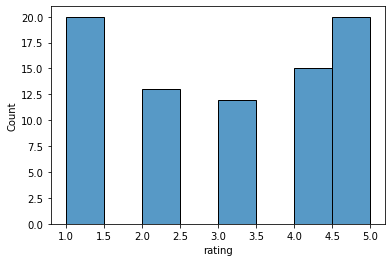

In [16]:
sns.histplot(amazon['rating'])
plt.show()

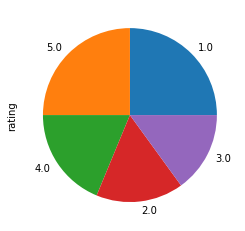

In [17]:
amazon.rating.value_counts().plot(kind='pie')
plt.show()

# Text Preprocessing

In [18]:
#to analyze the data we are a replicating the dataframe as amazon to store more columns but it won't distrub the main dataset
amazon_analysis = amazon.copy()

In [19]:
#Number of characters in single tweet
amazon_analysis['char_count'] = amazon_analysis['reviews'].str.len() ## this also includes spaces
amazon_analysis[['reviews','char_count']]

,reviews,char_count
0,Product is great but recieved the used product...,370
1,Never go for boat products againDidn't last fo...,370
2,Amazing 👌 (BT) HEADPHONESThe media could not b...,1706
3,Worst products.Plz don't buy this product.. af...,213
4,Perfect! Free of worriesWell I am writing this...,870
...,...,...
75,Sound quality is fine. But it keeps disconnect...,369
76,"Worst product, don't waste ur moneyEarcups/cus...",540
77,within 1month use its dead not power on headph...,548
78,Good audio but poor plasticThe audio is good a...,465


In [20]:
#count of special charaters in the text  
amazon_analysis['punctuations'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('[!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]')]))
amazon_analysis[['reviews','punctuations']]

,reviews,punctuations
0,Product is great but recieved the used product...,0
1,Never go for boat products againDidn't last fo...,0
2,Amazing 👌 (BT) HEADPHONESThe media could not b...,0
3,Worst products.Plz don't buy this product.. af...,0
4,Perfect! Free of worriesWell I am writing this...,0
...,...,...
75,Sound quality is fine. But it keeps disconnect...,0
76,"Worst product, don't waste ur moneyEarcups/cus...",0
77,within 1month use its dead not power on headph...,0
78,Good audio but poor plasticThe audio is good a...,0


In [21]:
#number of numericals present in each row
amazon_analysis['numerics'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
amazon_analysis[['reviews','numerics']]

,reviews,numerics
0,Product is great but recieved the used product...,0
1,Never go for boat products againDidn't last fo...,0
2,Amazing 👌 (BT) HEADPHONESThe media could not b...,3
3,Worst products.Plz don't buy this product.. af...,0
4,Perfect! Free of worriesWell I am writing this...,2
...,...,...
75,Sound quality is fine. But it keeps disconnect...,1
76,"Worst product, don't waste ur moneyEarcups/cus...",0
77,within 1month use its dead not power on headph...,2
78,Good audio but poor plasticThe audio is good a...,1


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

In [24]:
#number of stopwords in each tweet
stop = stopwords.words('english')

amazon_analysis['stopwords'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
amazon_analysis[['reviews','stopwords']]

,reviews,stopwords
0,Product is great but recieved the used product...,21
1,Never go for boat products againDidn't last fo...,24
2,Amazing 👌 (BT) HEADPHONESThe media could not b...,115
3,Worst products.Plz don't buy this product.. af...,14
4,Perfect! Free of worriesWell I am writing this...,62
...,...,...
75,Sound quality is fine. But it keeps disconnect...,28
76,"Worst product, don't waste ur moneyEarcups/cus...",35
77,within 1month use its dead not power on headph...,31
78,Good audio but poor plasticThe audio is good a...,34


### Removing Stopwords

In [25]:
#removing all the stopwords in the column 
stop = stopwords.words('english')
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon['reviews']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20920\1886737687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0     Product great recieved used product instead br...
1     Never go boat products againDidn't last month....
2     Amazing 👌 (BT) HEADPHONESThe media could loade...
3     Worst products.Plz buy product.. using half ho...
4     Perfect! Free worriesWell I writing review 6 m...
                            ...                        
75    Sound quality fine. But keeps disconnecting ph...
76    Worst product, waste ur moneyEarcups/cushion q...
77    within 1month use dead power headphone. AND WE...
78    Good audio poor plasticThe audio good battery ...
79    For Music loversAudio quality great, music, ba...
Name: reviews, Length: 80, dtype: object

In [26]:
amazon['reviews'].isnull().sum()

0

In [27]:
#converting all the upper case and sentence case in lower case 
amazon = amazon.apply(lambda x: x.astype(str).str.lower())

In [28]:
#converted in lower case
amazon.head()

,rating,reviews
0,4.0,product great recieved used product instead br...
1,1.0,never go boat products againdidn't last month....
2,5.0,amazing 👌 (bt) headphonesthe media could loade...
3,1.0,worst products.plz buy product.. using half ho...
4,5.0,perfect! free worrieswell i writing review 6 m...


In [29]:
#rare words counts
freq = pd.Series(' '.join(amazon['reviews']).split()).value_counts()[-10:]
freq

of             1
disturbance    1
e-waste.       1
stuck          1
then.          1
closed         1
window         1
sadly,         1
time,          1
rocker!        1
dtype: int64

In [30]:
#rare words removal
freq = list(freq.index)
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
amazon['reviews'].head()

0    product great recieved used product instead br...
1    never go boat products againdidn't last month....
2    amazing 👌 (bt) headphonesthe media could loade...
3    worst products.plz buy product.. using half ho...
4    perfect! free worrieswell i writing review 6 m...
Name: reviews, dtype: object

In [31]:
amazon

,rating,reviews
0,4.0,product great recieved used product instead br...
1,1.0,never go boat products againdidn't last month....
2,5.0,amazing 👌 (bt) headphonesthe media could loade...
3,1.0,worst products.plz buy product.. using half ho...
4,5.0,perfect! free worrieswell i writing review 6 m...
...,...,...
75,3.0,sound quality fine. but keeps disconnecting ph...
76,2.0,"worst product, waste ur moneyearcups/cushion q..."
77,5.0,within 1month use dead power headphone. and we...
78,2.0,good audio poor plasticthe audio good battery ...


In [32]:
amazon['reviews'].isnull().sum()

0

In [33]:
import re

In [34]:
#removing all the emojis present in the text 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
amazon['reviews'] = amazon['reviews'].apply(lambda x: remove_emoji(x))


In [35]:
amazon['reviews'] 

0     product great recieved used product instead br...
1     never go boat products againdidn't last month....
2     amazing  (bt) headphonesthe media could loaded...
3     worst products.plz buy product.. using half ho...
4     perfect! free worrieswell i writing review 6 m...
                            ...                        
75    sound quality fine. but keeps disconnecting ph...
76    worst product, waste ur moneyearcups/cushion q...
77    within 1month use dead power headphone. and we...
78    good audio poor plasticthe audio good battery ...
79    for music loversaudio quality great, music, ba...
Name: reviews, Length: 80, dtype: object

In [36]:
# from textblob import TextBlob

In [37]:
# #spelling corrections 
# amazon['reviews'] = amazon['reviews'][:5].apply(lambda x: str(TextBlob(x).correct()))
# amazon['reviews'] 

In [38]:
amazon['reviews'].isnull().sum()

0

### Stemming 

In [39]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
amazon['reviews'] [:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    product great reciev use product instead brand...
1    never go boat product againdidn't last month.....
2    amaz (bt) headphonesth media could loaded. so ...
3    worst products.plz buy product.. use half hour...
4    perfect! free worrieswel i write review 6 mont...
Name: reviews, dtype: object

In [40]:
from textblob import Word
from textblob import TextBlob

### Lemmatization

In [41]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
amazon['reviews']  = amazon['reviews'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
amazon['reviews'] .head()

0    product great recieved used product instead br...
1    never go boat product againdidn't last month.....
2    amazing (bt) headphonesthe medium could loaded...
3    worst products.plz buy product.. using half ho...
4    perfect! free worrieswell i writing review 6 m...
Name: reviews, dtype: object

### N_gram

In [43]:
#bigrams
TextBlob(amazon['reviews'] [0]).ngrams(2)

[WordList(['product', 'great']),
 WordList(['great', 'recieved']),
 WordList(['recieved', 'used']),
 WordList(['used', 'product']),
 WordList(['product', 'instead']),
 WordList(['instead', 'brand']),
 WordList(['brand', 'new.headphones']),
 WordList(['new.headphones', 'great']),
 WordList(['great', 'recieved']),
 WordList(['recieved', 'already']),
 WordList(['already', 'used']),
 WordList(['used', 'someone']),
 WordList(['someone', 'headphones']),
 WordList(['headphones', 'seal']),
 WordList(['seal', 'broken']),
 WordList(['broken', 'reattached']),
 WordList(['reattached', 'scratch']),
 WordList(['scratch', 'visible']),
 WordList(['visible', 'along']),
 WordList(['along', 'side']),
 WordList(['side', 'earcups']),
 WordList(['earcups', 'also']),
 WordList(['also', 'watch']),
 WordList(['watch', 'something']),
 WordList(['something', 'netflix']),
 WordList(['netflix', 'either']),
 WordList(['either', 'right']),
 WordList(['right', 'side']),
 WordList(['side', 'left']),
 WordList(['left',

In [44]:
#trigrams
TextBlob(amazon['reviews'] [0]).ngrams(3)

[WordList(['product', 'great', 'recieved']),
 WordList(['great', 'recieved', 'used']),
 WordList(['recieved', 'used', 'product']),
 WordList(['used', 'product', 'instead']),
 WordList(['product', 'instead', 'brand']),
 WordList(['instead', 'brand', 'new.headphones']),
 WordList(['brand', 'new.headphones', 'great']),
 WordList(['new.headphones', 'great', 'recieved']),
 WordList(['great', 'recieved', 'already']),
 WordList(['recieved', 'already', 'used']),
 WordList(['already', 'used', 'someone']),
 WordList(['used', 'someone', 'headphones']),
 WordList(['someone', 'headphones', 'seal']),
 WordList(['headphones', 'seal', 'broken']),
 WordList(['seal', 'broken', 'reattached']),
 WordList(['broken', 'reattached', 'scratch']),
 WordList(['reattached', 'scratch', 'visible']),
 WordList(['scratch', 'visible', 'along']),
 WordList(['visible', 'along', 'side']),
 WordList(['along', 'side', 'earcups']),
 WordList(['side', 'earcups', 'also']),
 WordList(['earcups', 'also', 'watch']),
 WordList(['

# CountVectorizer

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(amazon['reviews'])
print(cv.get_feature_names())

['02', '03', '07', '08', '10', '100', '1000', '1000then', '10bass', '10build', '10m', '10mic', '10sound', '10total', '1100', '12', '1200', '1200the', '13992', '14', '15', '19', '1hr', '1k', '1kbought', '1month', '1st', '20', '200', '2020', '2021', '2021didn', '2022', '25', '27', '2hrs', '2k', '2months', '30', '3000', '310', '350', '370', '38', '40', '400', '450', '50', '500', '50if', '5hr', '5k', '60', '700', '80', '899', '899rs', '8hrs', '90', '900', '999', 'able', 'above', 'absolutely', 'accept', 'according', 'ache', 'activate', 'actually', 'ad', 'adjust', 'adjustable', 'adjustment', 'adult', 'adults', 'advantages', 'advice', 'advise', 'aesthetic', 'affordable', 'after', 'aftermarket', 'ag', 'again', 'againdidn', 'ago', 'ain', 'airspace', 'all', 'almost', 'along', 'alos', 'alot', 'already', 'also', 'always', 'amazing', 'amazingthe', 'amazon', 'amazonamazon', 'amplitude', 'anc', 'and', 'android', 'annoying', 'another', 'any', 'anybody', 'anyone', 'anything', 'anyways', 'apart', 'apex'

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
cv = CountVectorizer()

reviewcv = cv.fit_transform(amazon['reviews'] )
sum_words = reviewcv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['words', 'count']


pd.options.display.max_rows=None
wf_df

,words,count
0,quality,96
1,good,89
2,product,88
3,sound,80
4,it,72
5,headphone,65
6,ear,48
7,also,38
8,the,38
9,one,37


### CountVectorizer with Bi-gram & Tri-gram

Bi-gram

In [48]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [49]:
top2_words = get_top_n2_words(amazon['reviews'], n=5000) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

,Bi-gram,Freq
0,sound quality,42
1,build quality,15
2,aux cable,12
3,buy product,11
4,noise cancellation,10
5,quality good,10
6,battery life,8
7,good product,8
8,it broke,6
9,medium could,6


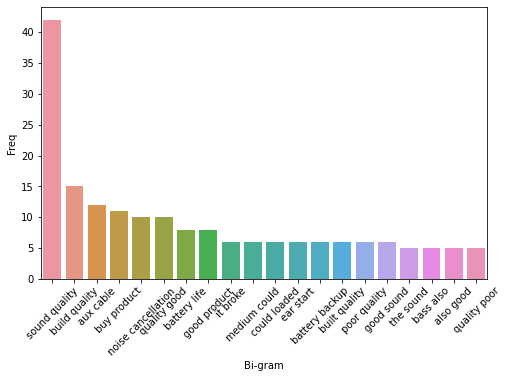

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 5)) #figure size of the visualization
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

Tri-gram

In [51]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [52]:
top3_words = get_top_n3_words(amazon['reviews'] , n=5000)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

top3_df

,Tri-gram,Freq
0,sound quality good,8
1,medium could loaded,6
2,good sound quality,5
3,ear start paining,4
4,using half hour,3
5,boat rockerz 450,3
6,bass also good,3
7,quality good but,3
8,last month it,2
9,month it broke,2


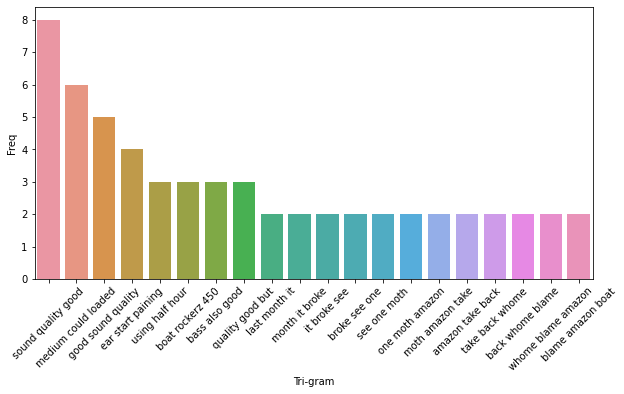

In [53]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

# Named Entity Recognition (NER)

In [54]:
import string 
import re #regular expression
import spacy

In [55]:
nlp = spacy.load("en_core_web_sm")

one_block = str(amazon['reviews'])
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [56]:
#nouns and verbs in the text
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['product', 'recieved', 'used', 'product', 'br', 'go', 'boat', 'product', 'month', 'medium', 'loaded', 'buy', 'product', 'using', 'writing', 'review', 'value', 'money', 'productnice', 'quality', 'crystal', 'definit', 'broke', 'month', 'return', 'warranty', 'soundboat', 'rocker', 'headphones', 'price', 'productno', 'voice', 'cancellation', 'head', 'stared', 'paining', 'product', 'wish', 'give', 'consi', 'start', 'sound', 'batt', 'goodafter', 'reading', 'review', 'people', 'problem', 'headphone', 'term', 'audio', 'ergonomicsbought', 'month', 'ago.works', 'sound', 'quality', 'build', 'quality', 'poor!sou', 'product', 'price', 'rangethe', 'medium', 'loade', 'disappointed', 'purchase', 'issueit', 'month', 'using', 'battery', 'lifei', 'using', 'month', 'waste', 'moneyi', 'believe', 'noise', 'cancellation', 'son', 'hear', 'product', 'great.i', 'itwas', 'working', '1st', 'week', 'started', 'pain', 'earsi', 'using', 'headphone', 'price(999)i', 'bought', 'attend', 'class', 'co', 'mind', 'blowing

In [57]:

len(nouns_verbs)

270

In [58]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#with collected nouns and verbs
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','count']
wd_df

,words,count
0,product,17
1,quality,15
2,headphone,14
3,month,6
4,price,6
5,sound,6
6,build,6
7,using,5
8,review,4
9,medium,3


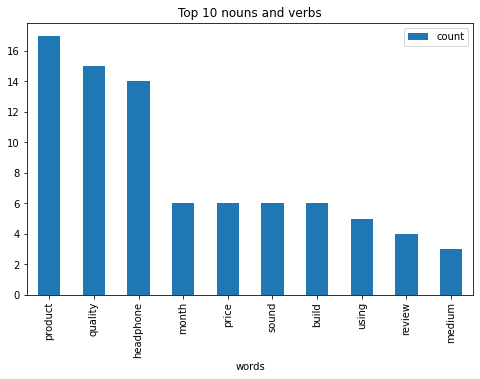

In [59]:
# Visualizing results (Barchart for top 10[nouns + verbs])

wd_df[0:10].plot.bar(x='words',figsize=(8,5),title='Top 10 nouns and verbs');
plt.show()

# Word Cloud

In [60]:
from PIL import Image

<Figure size 432x288 with 0 Axes>

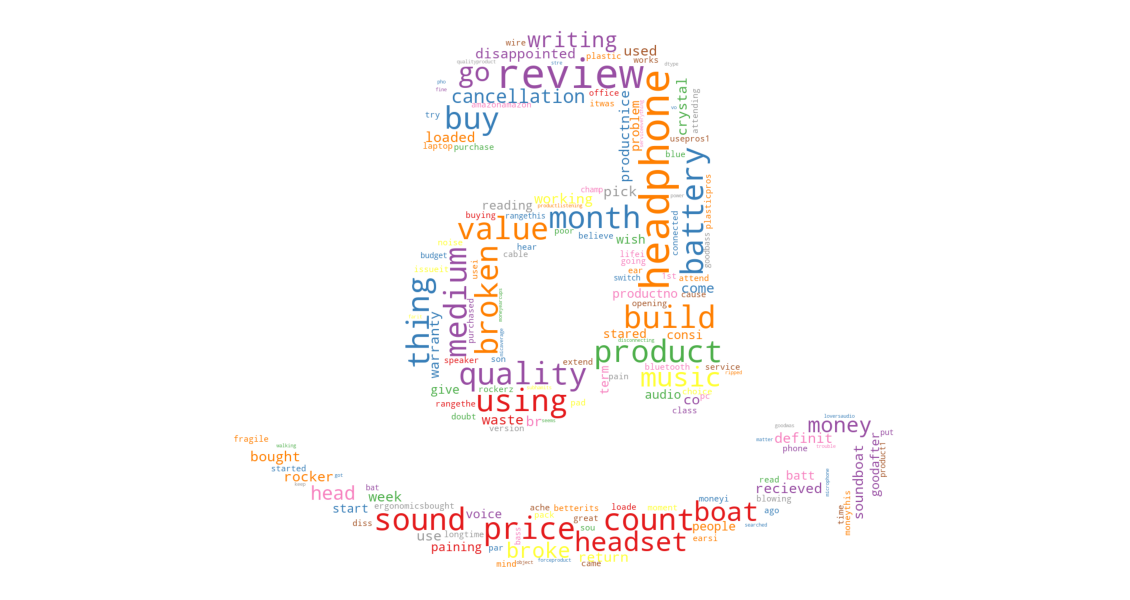

In [61]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('words')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
mask = np.array(Image.open("D:\\DATA SCIENCE\\Project\\Sentiment Analysis on Amazon Product Reviews\\amazon-icon-6.png"))
wordcloud = WordCloud(width=10000,height=5000,background_color='white',max_words=500,
                   colormap='Set1', mask=mask, stopwords=STOPWORDS).generate(str(wd_df))
plt.savefig("amazon.png", format="png")
plot_cloud(wordcloud)
plt.show()

## Sentiment Analysis for each word

In [62]:
#sentiment
wd_df['words'][:5].apply(lambda x: TextBlob(x).sentiment)
wd_df['sentiment'] = wd_df['words'].apply(lambda x: TextBlob(x).sentiment[0] )
wd_df[['words','sentiment']]

,words,sentiment
0,product,0.000000
1,quality,0.000000
2,headphone,0.000000
3,month,0.000000
4,price,0.000000
5,sound,0.400000
6,build,0.000000
7,using,0.000000
8,review,0.000000
9,medium,0.000000


In [63]:
#  subjectivity and polarity 
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

wd_df['Subjectivity'] = wd_df['words'].apply(getSubjectivity)
wd_df['Polarity'] = wd_df['words'].apply(getPolarity)


In [64]:
wd_df

,words,count,sentiment,Subjectivity,Polarity
0,product,17,0.000000,0.00,0.000000
1,quality,15,0.000000,0.00,0.000000
2,headphone,14,0.000000,0.00,0.000000
3,month,6,0.000000,0.00,0.000000
4,price,6,0.000000,0.00,0.000000
5,sound,6,0.400000,0.40,0.400000
6,build,6,0.000000,0.00,0.000000
7,using,5,0.000000,0.00,0.000000
8,review,4,0.000000,0.00,0.000000
9,medium,3,0.000000,0.00,0.000000


In [65]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
wd_df['Analysis'] = wd_df['Polarity'].apply(getAnalysis)

In [66]:
wd_df

,words,count,sentiment,Subjectivity,Polarity,Analysis
0,product,17,0.000000,0.00,0.000000,Neutral
1,quality,15,0.000000,0.00,0.000000,Neutral
2,headphone,14,0.000000,0.00,0.000000,Neutral
3,month,6,0.000000,0.00,0.000000,Neutral
4,price,6,0.000000,0.00,0.000000,Neutral
5,sound,6,0.400000,0.40,0.400000,Positive
6,build,6,0.000000,0.00,0.000000,Neutral
7,using,5,0.000000,0.00,0.000000,Neutral
8,review,4,0.000000,0.00,0.000000,Neutral
9,medium,3,0.000000,0.00,0.000000,Neutral


In [67]:
wd_df['Analysis'].count

<bound method Series.count of 0       Neutral
1       Neutral
2       Neutral
3       Neutral
4       Neutral
5      Positive
6       Neutral
7       Neutral
8       Neutral
9       Neutral
10      Neutral
11      Neutral
12      Neutral
13     Negative
14      Neutral
15      Neutral
16      Neutral
17      Neutral
18      Neutral
19      Neutral
20      Neutral
21      Neutral
22      Neutral
23      Neutral
24     Negative
25     Negative
26      Neutral
27      Neutral
28      Neutral
29      Neutral
30      Neutral
31      Neutral
32      Neutral
33      Neutral
34      Neutral
35      Neutral
36      Neutral
37      Neutral
38      Neutral
39      Neutral
40      Neutral
41      Neutral
42      Neutral
43      Neutral
44      Neutral
45      Neutral
46      Neutral
47      Neutral
48      Neutral
49      Neutral
50      Neutral
51      Neutral
52      Neutral
53      Neutral
54      Neutral
55      Neutral
56      Neutral
57      Neutral
58      Neutral
59      Neutral
60      Ne

<AxesSubplot:>

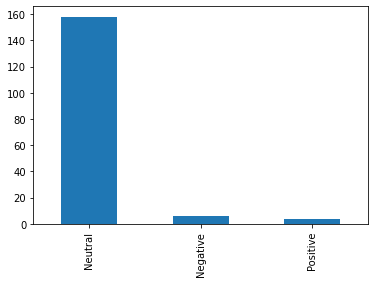

In [68]:
wd_df['Analysis'].value_counts().plot(kind='bar')

# Sentiment Analysis for each review

In [69]:
amazon['reviews'][:5].apply(lambda x: TextBlob(x).sentiment)


0    (0.16428571428571428, 0.48928571428571427)
1    (-0.07142857142857142, 0.2190476190476191)
2      (0.2799242424242424, 0.6097902097902097)
3     (-0.5833333333333334, 0.5833333333333334)
4     (0.39216666666666666, 0.5544999999999999)
Name: reviews, dtype: object

In [70]:
amazon['sentiment'] = amazon['reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
amazon[['reviews','sentiment']]

,reviews,sentiment
0,product great recieved used product instead br...,0.164286
1,never go boat product againdidn't last month.....,-0.071429
2,amazing (bt) headphonesthe medium could loaded...,0.279924
3,worst products.plz buy product.. using half ho...,-0.583333
4,perfect! free worrieswell i writing review 6 m...,0.392167
5,value money productnice,0.000000
6,sound quality crystal clear [hd] (high definit...,0.243292
7,broke 3 month won’t return warranty periodprod...,-0.100000
8,very nice soundboat rocker 310 perhaps best so...,0.521667
9,useless headphones.poor basic headphones. high...,-0.007738


## Subjectivity and Polarity 

In [71]:
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

amazon['Subjectivity'] = amazon['reviews'].apply(getSubjectivity)
amazon['Polarity'] = amazon['reviews'].apply(getPolarity)


In [72]:
amazon

,rating,reviews,sentiment,Subjectivity,Polarity
0,4.0,product great recieved used product instead br...,0.164286,0.489286,0.164286
1,1.0,never go boat product againdidn't last month.....,-0.071429,0.219048,-0.071429
2,5.0,amazing (bt) headphonesthe medium could loaded...,0.279924,0.609790,0.279924
3,1.0,worst products.plz buy product.. using half ho...,-0.583333,0.583333,-0.583333
4,5.0,perfect! free worrieswell i writing review 6 m...,0.392167,0.554500,0.392167
5,4.0,value money productnice,0.000000,0.000000,0.000000
6,5.0,sound quality crystal clear [hd] (high definit...,0.243292,0.500667,0.243292
7,1.0,broke 3 month won’t return warranty periodprod...,-0.100000,0.314286,-0.100000
8,5.0,very nice soundboat rocker 310 perhaps best so...,0.521667,0.558333,0.521667
9,1.0,useless headphones.poor basic headphones. high...,-0.007738,0.398175,-0.007738


In [73]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
amazon['Analysis'] = amazon['Polarity'].apply(getAnalysis)

In [74]:
amazon

,rating,reviews,sentiment,Subjectivity,Polarity,Analysis
0,4.0,product great recieved used product instead br...,0.164286,0.489286,0.164286,Positive
1,1.0,never go boat product againdidn't last month.....,-0.071429,0.219048,-0.071429,Negative
2,5.0,amazing (bt) headphonesthe medium could loaded...,0.279924,0.609790,0.279924,Positive
3,1.0,worst products.plz buy product.. using half ho...,-0.583333,0.583333,-0.583333,Negative
4,5.0,perfect! free worrieswell i writing review 6 m...,0.392167,0.554500,0.392167,Positive
5,4.0,value money productnice,0.000000,0.000000,0.000000,Neutral
6,5.0,sound quality crystal clear [hd] (high definit...,0.243292,0.500667,0.243292,Positive
7,1.0,broke 3 month won’t return warranty periodprod...,-0.100000,0.314286,-0.100000,Negative
8,5.0,very nice soundboat rocker 310 perhaps best so...,0.521667,0.558333,0.521667,Positive
9,1.0,useless headphones.poor basic headphones. high...,-0.007738,0.398175,-0.007738,Negative


<AxesSubplot:>

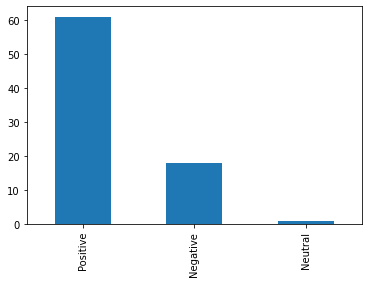

In [75]:
amazon['Analysis'].value_counts().plot(kind='bar')

In [76]:
amazon

,rating,reviews,sentiment,Subjectivity,Polarity,Analysis
0,4.0,product great recieved used product instead br...,0.164286,0.489286,0.164286,Positive
1,1.0,never go boat product againdidn't last month.....,-0.071429,0.219048,-0.071429,Negative
2,5.0,amazing (bt) headphonesthe medium could loaded...,0.279924,0.609790,0.279924,Positive
3,1.0,worst products.plz buy product.. using half ho...,-0.583333,0.583333,-0.583333,Negative
4,5.0,perfect! free worrieswell i writing review 6 m...,0.392167,0.554500,0.392167,Positive
5,4.0,value money productnice,0.000000,0.000000,0.000000,Neutral
6,5.0,sound quality crystal clear [hd] (high definit...,0.243292,0.500667,0.243292,Positive
7,1.0,broke 3 month won’t return warranty periodprod...,-0.100000,0.314286,-0.100000,Negative
8,5.0,very nice soundboat rocker 310 perhaps best so...,0.521667,0.558333,0.521667,Positive
9,1.0,useless headphones.poor basic headphones. high...,-0.007738,0.398175,-0.007738,Negative


## Generate Positive Reviews Word Cloud

In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')

In [78]:
Positive = wc.generate(amazon[amazon['Polarity']>0]['reviews'].str.cat(sep=""))

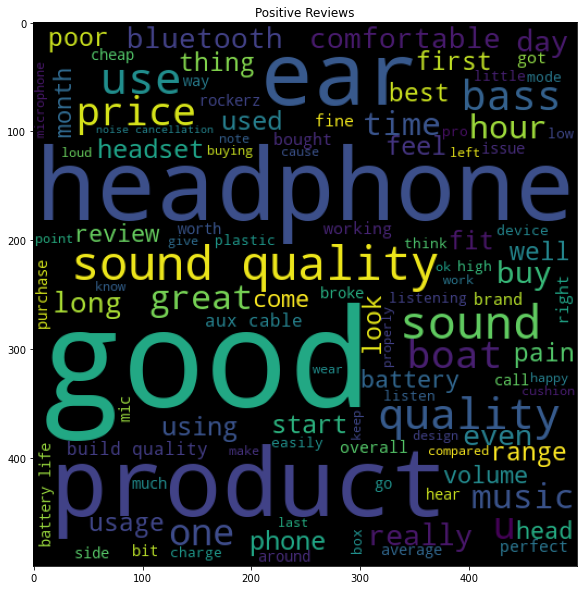

In [79]:
plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()

## Generate Negative Reviews Word Cloud

In [80]:
Negative=wc.generate(amazon[amazon['Polarity']<0]['reviews'].str.cat(sep=""))

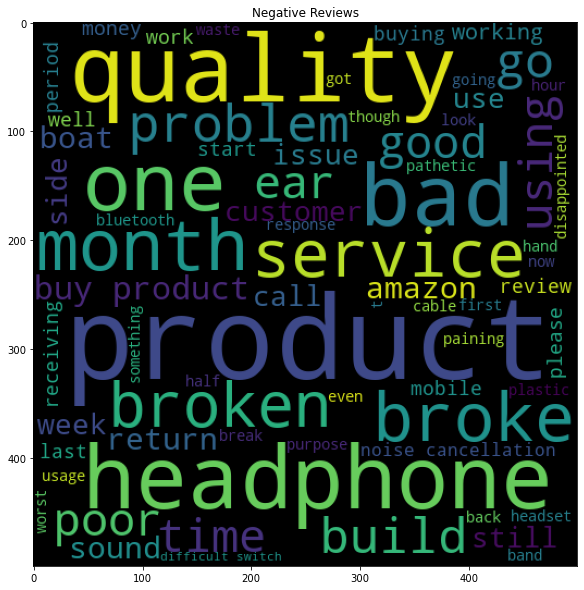

In [81]:
plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

## Generate Neutral Reviews Word Cloud

In [82]:
Neutral = wc.generate(amazon[amazon['Polarity']==0]['reviews'].str.cat(sep=""))

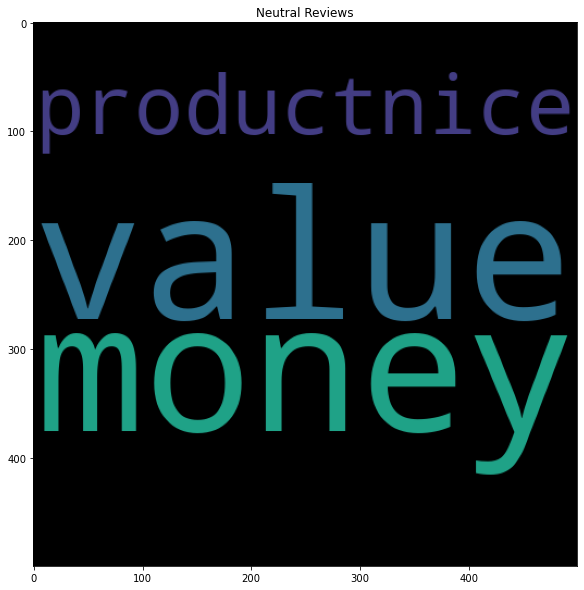

In [83]:
plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

# Model Building 

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [85]:
x=vectorizer.fit_transform(amazon['reviews'])

In [86]:
#rows, reviews
x.shape

(80, 1312)

### LabelEncoder for classification Model

In [87]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [88]:
amazon['target']=encoder.fit_transform(amazon['Analysis'])
amazon

,rating,reviews,sentiment,Subjectivity,Polarity,Analysis,target
0,4.0,product great recieved used product instead br...,0.164286,0.489286,0.164286,Positive,2
1,1.0,never go boat product againdidn't last month.....,-0.071429,0.219048,-0.071429,Negative,0
2,5.0,amazing (bt) headphonesthe medium could loaded...,0.279924,0.609790,0.279924,Positive,2
3,1.0,worst products.plz buy product.. using half ho...,-0.583333,0.583333,-0.583333,Negative,0
4,5.0,perfect! free worrieswell i writing review 6 m...,0.392167,0.554500,0.392167,Positive,2
5,4.0,value money productnice,0.000000,0.000000,0.000000,Neutral,1
6,5.0,sound quality crystal clear [hd] (high definit...,0.243292,0.500667,0.243292,Positive,2
7,1.0,broke 3 month won’t return warranty periodprod...,-0.100000,0.314286,-0.100000,Negative,0
8,5.0,very nice soundboat rocker 310 perhaps best so...,0.521667,0.558333,0.521667,Positive,2
9,1.0,useless headphones.poor basic headphones. high...,-0.007738,0.398175,-0.007738,Negative,0


In [89]:
y_svc=amazon['target'].values
y_svc

array([2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2])

In [90]:
from sklearn.model_selection import train_test_split   

In [91]:
X_train,X_test,y_train,y_test=train_test_split(x,y_svc,test_size=0.1,random_state=40)

# SVC

In [92]:
from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [93]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[25,20,10,1,0.5],'C':[20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [20, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [25, 20, 10, 1, 0.5], 'kernel': ['rbf']}])

In [94]:
gsv.best_params_ , gsv.best_score_ 

({'C': 20, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7928571428571429)

In [95]:
clf = SVC(C= 20, gamma = 25)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 75.0


array([[0, 2],
       [0, 6]], dtype=int64)

# KNN

In [96]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [98]:
print(grid_search.best_params_)

{'n_neighbors': 3}


In [99]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 83.57%


In [100]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [101]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [102]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [103]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 87.5


# Bagging Boosting 

In [104]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [106]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
y_predict = dcmodel.predict(X_test)

In [107]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  75.0


# Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [109]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [110]:
rf.fit(X_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

rf.oob_score_ 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


0.75

In [111]:
rf.predict(X_test)

array([2, 2, 2, 2, 0, 2, 2, 2])

In [112]:
preds = rf.predict(X_test)
pd.Series(preds).value_counts()

2    7
0    1
dtype: int64

In [113]:
preds

array([2, 2, 2, 2, 0, 2, 2, 2])

In [114]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0,0,2
row_0,,
0,1,1
2,0,6


In [115]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(preds==y_test)

0.875

In [116]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



# XGBoost (Extreme Gradient Boosting)

In [117]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [118]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

[22:16:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [119]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [120]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [121]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.50%


### XGBoost giving the best result, we can use it for deployment

In [122]:
amazon

,rating,reviews,sentiment,Subjectivity,Polarity,Analysis,target
0,4.0,product great recieved used product instead br...,0.164286,0.489286,0.164286,Positive,2
1,1.0,never go boat product againdidn't last month.....,-0.071429,0.219048,-0.071429,Negative,0
2,5.0,amazing (bt) headphonesthe medium could loaded...,0.279924,0.609790,0.279924,Positive,2
3,1.0,worst products.plz buy product.. using half ho...,-0.583333,0.583333,-0.583333,Negative,0
4,5.0,perfect! free worrieswell i writing review 6 m...,0.392167,0.554500,0.392167,Positive,2
5,4.0,value money productnice,0.000000,0.000000,0.000000,Neutral,1
6,5.0,sound quality crystal clear [hd] (high definit...,0.243292,0.500667,0.243292,Positive,2
7,1.0,broke 3 month won’t return warranty periodprod...,-0.100000,0.314286,-0.100000,Negative,0
8,5.0,very nice soundboat rocker 310 perhaps best so...,0.521667,0.558333,0.521667,Positive,2
9,1.0,useless headphones.poor basic headphones. high...,-0.007738,0.398175,-0.007738,Negative,0


In [123]:
import pickle 

In [124]:
#downloading pkl file in write binary format
pickle.dump(amazon,open('amazon_pkl.pkl','wb'))

In [125]:
amazon.to_csv(r'D:\DATA SCIENCE\Project\Sentiment Analysis on Amazon Product Reviews\amazon_final.csv', index=False)